# Standard PCA

## Setup

Use the requirments file at the following path: `DATA/requirments.txt` to load the packesges and correct version for reproducability.


### Sklearn


In [1]:
%load_ext autoreload

In [2]:

## Setup

# Imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import csv
import warnings
import seaborn as sns
import openpyxl
import json
#from tabulate import tabulate

# Sklearn Imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

# Py File Imports
from supporting_functions import get_fp, loadData, saveData

# Get Correct Filepath
#cpu = "surface"
cpu = "man_dtop"
#cpu = "sean"
folder_fp, data_fp, figures_fp = get_fp(cpu, figuresFolder="2.standardPCA/")

rawPhys, rawRheo, physDict, rheoDict, imputedRheo = loadData(data_fp)

/home/msmitty/Documents/TransientBloodRheo_ML/Writing/Figures/2.standardPCA/


## Data Subset

Select specifc features based on clinical importance.

In [3]:
# Abrevations
abr = [sub_dict['abbreviation'] for sub_dict in physDict.values()]

# Subset Abrvations
abrSubset = ['HCT', 'FIB', 'CHOL', 'TRIG', 'HDL', 'LDL', 
            'WBC', 'RBC', 'HEM', 'MCV', 'MCH', 'MCHC']

# Create a Mapping
rename_mapping = {}
for full_name, props in physDict.items():
    abbr = props.get('abbreviation')
    if abbr in abrSubset:
        rename_mapping[physDict[full_name]["column_name"]] = abbr
        
# Rename the columns
clean_Phys = rawPhys.rename(columns=rename_mapping)

# Subset Variables
subset_Phys = clean_Phys[abrSubset]

# Donor Labels
donor_labels = rawPhys['donors'].values

In [4]:
# Get X
X = subset_Phys.values
#X = clean_Phys.iloc[:, 1:-1].values

# Scale Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Labels
labels = []
for i in range(len(X_pca)):
    letter_index = i if i < 4 else i + 1  # Skip E
    labels.append(chr(65 + letter_index))

# Create DataFrame for PCA
pca_df = pd.DataFrame(
    X_pca,
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])],
    index=labels
)
X_pca_np = np.array(X_pca)

In [15]:
# Print PCA Table
fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('tight')
ax.axis('off')

# Use First 8 PCAs
pca_df = pca_df.iloc[:, :8]  # Select first 8 PCs

# Create table
table = ax.table(cellText=pca_df.round(3).values,
                rowLabels=pca_df.index,
                colLabels=pca_df.columns,
                cellLoc='center',
                loc='center')

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

plt.title('PCA Transformed Data', fontsize=14, pad=20)
fp = figures_fp + 's2_006_pcaTable.png'
plt.savefig(fp, dpi=300, bbox_inches='tight')
plt.close()
#plt.show()
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
A,-0.296505,-1.335641,-1.620440,-0.136459,-1.554605,0.457042,-1.397444,-0.334513
B,-0.688949,-0.158299,0.233413,-1.186555,1.021240,-0.565062,-0.264052,-1.862134
C,-1.780087,-2.023437,-0.566639,-0.165953,-0.234111,-0.678249,-0.406533,-0.136230
D,-0.670672,0.154158,1.669290,-0.367172,2.577543,-0.943359,-0.359444,-0.142236
F,-4.516955,-0.672599,-1.354951,-1.096900,-0.277290,0.268121,1.231894,-0.230324
G,-2.835879,-0.745973,0.474947,-0.974189,-0.764095,0.348398,0.074235,1.065173
H,-2.147767,2.442998,1.249941,-0.190591,-0.962658,0.222619,-0.389715,0.388528
I,-0.990158,-1.278228,0.563076,0.642087,-0.634916,0.353353,0.800503,-0.357434
J,2.203444,0.243904,0.838581,1.362909,-1.123338,-0.881596,-0.398608,0.653201
K,2.059788,-2.629130,-0.681670,-0.410548,0.798055,1.974796,-1.281487,0.013773


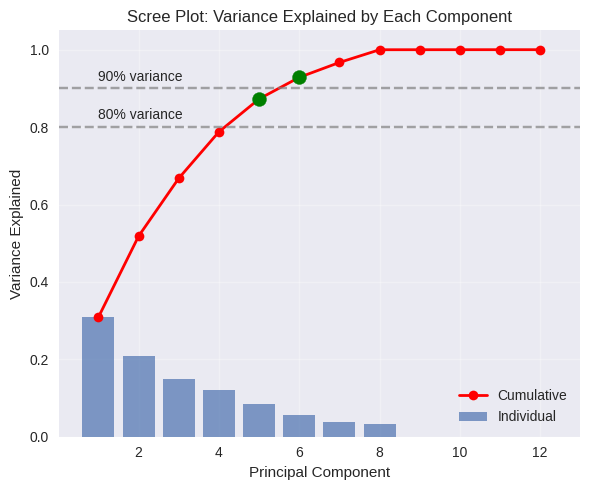

In [16]:
# Plot 1: Scree Plot
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(6, 5))

variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)

plt.bar(range(1, len(variance_ratio) + 1), variance_ratio, 
        alpha=0.7, label='Individual')
plt.plot(range(1, len(variance_ratio) + 1), cumulative_variance, 
         'ro-', linewidth=2, label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot: Variance Explained by Each Component')
plt.legend()
plt.grid(True, alpha=0.3)

# Mark where we reach 80% and 90% variance explained
for threshold in [0.8, 0.9]:
    idx = np.where(cumulative_variance >= threshold)[0][0]
    plt.axhline(y=threshold, color='gray', linestyle='--', alpha=0.7)
    plt.text(1, threshold + 0.02, f'{threshold*100:.0f}% variance', 
             fontsize=10)
    plt.scatter(idx + 1, cumulative_variance[idx], s=100, 
                color='green', zorder=5)

plt.tight_layout()
fp = figures_fp + 's2_003_screePlot.png'
plt.savefig(fp, dpi=300, bbox_inches='tight')
plt.show()

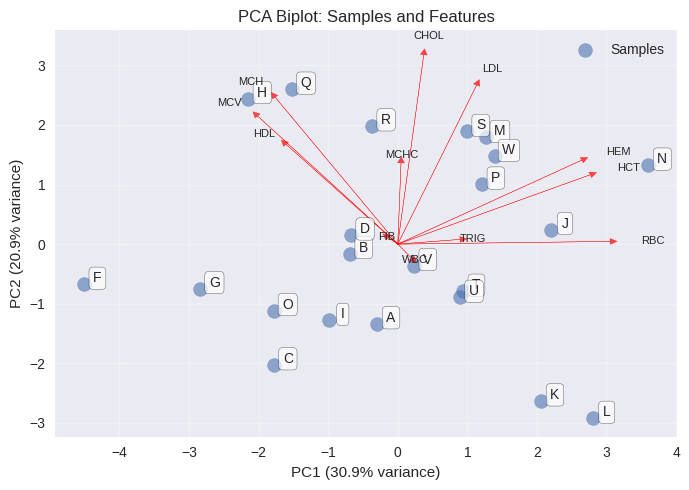

In [17]:
# Plot 2: Biplot
plt.figure(figsize=(7, 5))

loadings = pca.components_[:2, :].T
scale_factor = 6  # Adjust for feature visibility

# Plot scores (samples)
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=100, alpha=0.6, 
           label='Samples')

# Add labels A-W to each point
labels = []
for i in range(len(X_pca)):
    letter_index = i if i < 4 else i + 1  # Skip E (index 4)
    labels.append(chr(65 + letter_index))

for i, label in enumerate(labels):
    plt.text(X_pca[i, 0] + 0.2, X_pca[i, 1] + 0.1, label, 
             fontsize=10, ha='center', va='center', 
             bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.7))

# Plot loadings (variables)
for i, (feature, loading) in enumerate(zip(abrSubset, loadings)):
    plt.arrow(0, 0, loading[0]*scale_factor, loading[1]*scale_factor, 
              head_width=0.1, head_length=0.1, 
              fc='red', ec='red', alpha=0.7)
    plt.text(loading[0]*scale_factor*1.2, loading[1]*scale_factor*1.1, 
             feature, fontsize=8, ha='center', va='center')

plt.xlabel(f'PC1 ({variance_ratio[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({variance_ratio[1]*100:.1f}% variance)')
plt.title('PCA Biplot: Samples and Features')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
fp = figures_fp + 's2_004_pcaBiplot.png'
plt.savefig(fp, dpi=300, bbox_inches='tight')
plt.show()

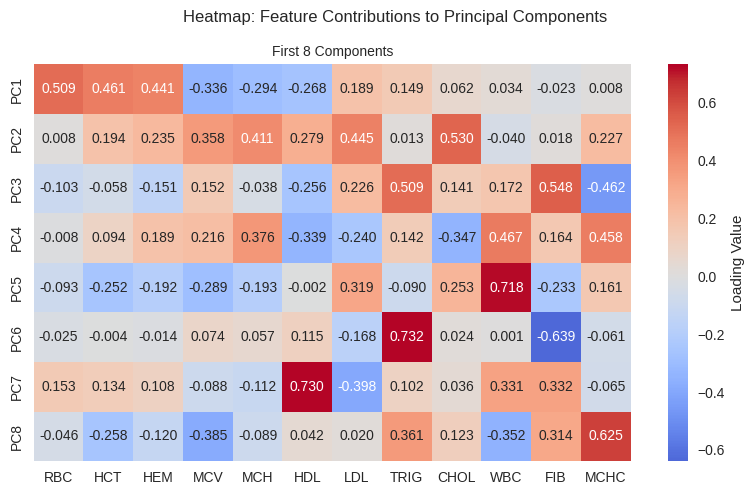

In [18]:
# Feature Importance
# Create a DataFrame showing the contribution of each feature to each PC
n_components_to_show = 8  # Show first 8 components
feature_importance = pd.DataFrame(
    pca.components_[:n_components_to_show, :].T,
    columns=[f'PC{i+1}' for i in range(n_components_to_show)],
    index=abrSubset
)

# Sort features by their absolute contribution to PC1
feature_importance['PC1_abs'] = np.abs(feature_importance['PC1'])
feature_importance_sorted = feature_importance.sort_values('PC1_abs', 
                                                         ascending=False)

# Create a heatmap of feature contributions (transposed)
plt.figure(figsize=(8, 5))  # Swapped width/height for new orientation
# Color Blind Palette
sns.heatmap(feature_importance_sorted.drop('PC1_abs', axis=1).T, 
            cmap='coolwarm',  # Changed from 'RdBu_r'
            center=0, 
            cbar_kws={'label': 'Loading Value'},
            fmt='.3f', annot=True)
plt.suptitle('Heatmap: Feature Contributions to Principal Components')
plt.title('First 8 Components',  fontsize=10)
plt.tight_layout()
fp = figures_fp + 's2_005_pcaHeatmap.png'
plt.savefig(fp, dpi=300, bbox_inches='tight')
plt.show()

In [61]:
# Print summary statistics
print("PCA Summary:")
print(f"Total features: {len(abrSubset)}")
print(f"Total samples: {len(X)}")
print(f"\nVariance explained by first 8 components:")
for i in range(min(8, len(variance_ratio))):
    print(f"PC{i+1}: {variance_ratio[i]*100:.2f}%")

print(f"\nCumulative variance explained:")
for i in range(min(8, len(cumulative_variance))):
    print(f"First {i+1} PCs: {cumulative_variance[i]*100:.2f}%")

# Identify the minimum number of components for 80% and 90% variance
n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
print(f"\nComponents needed for 80% variance: {n_components_80}")
print(f"Components needed for 90% variance: {n_components_90}")

# Show the top contributing features for PC1 and PC2
for i in range(8):
    print(f"\nTop 5 features contributing to PC{i+1}:")
    pc_contributions = pd.Series(pca.components_[i], index=abrSubset)
    print(pc_contributions.abs().sort_values(ascending=False).head())

PCA Summary:
Total features: 12
Total samples: 22

Variance explained by first 8 components:
PC1: 30.88%
PC2: 20.93%
PC3: 14.96%
PC4: 12.01%
PC5: 8.49%
PC6: 5.58%
PC7: 3.85%
PC8: 3.29%

Cumulative variance explained:
First 1 PCs: 30.88%
First 2 PCs: 51.81%
First 3 PCs: 66.77%
First 4 PCs: 78.78%
First 5 PCs: 87.27%
First 6 PCs: 92.85%
First 7 PCs: 96.70%
First 8 PCs: 99.99%

Components needed for 80% variance: 5
Components needed for 90% variance: 6

Top 5 features contributing to PC1:
RBC    0.508818
HCT    0.461016
HEM    0.440788
MCV    0.335730
MCH    0.293885
dtype: float64

Top 5 features contributing to PC2:
CHOL    0.529620
LDL     0.444758
MCH     0.410952
MCV     0.358250
HDL     0.279185
dtype: float64

Top 5 features contributing to PC3:
FIB     0.548388
TRIG    0.508542
MCHC    0.461581
HDL     0.256319
LDL     0.226218
dtype: float64

Top 5 features contributing to PC4:
WBC     0.466685
MCHC    0.458091
MCH     0.375852
CHOL    0.346660
HDL     0.338662
dtype: float64

To

In [56]:
# PCA vs Factor Analysis
pca = PCA()
fa = FactorAnalysis(n_components=len(abrSubset))

pca_result = pca.fit_transform(X_scaled)
fa_result = fa.fit_transform(X_scaled)

variance_table = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(8)],
    'Eigenvalue': pca.explained_variance_[:8],
    'Variance (%)': pca.explained_variance_ratio_[:8] * 100,
    'Cumulative (%)': np.cumsum(pca.explained_variance_ratio_[:8]) * 100
})

variance_table

PCA variance explained: [0.30879214 0.20934299 0.1495814  0.12009879 0.08486888]
FA variance explained: [0.36041646 0.74613982 0.4954302  0.72472658 0.58556561]


,Component,Eigenvalue,Variance (%),Cumulative (%)
0,PC1,3.881958,30.879214,30.879214
1,PC2,2.631740,20.934299,51.813514
2,PC3,1.880452,14.958140,66.771654
3,PC4,1.509813,12.009879,78.781532
4,PC5,1.066923,8.486888,87.268421
5,PC6,0.701588,5.580816,92.849237
6,PC7,0.483982,3.849858,96.699095
7,PC8,0.413327,3.287827,99.986922
